Function for T-S plot with improved high and low tides markers. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from salishsea_tools import (nc_tools, geo_tools, tidetools) 
import netCDF4 as nc

In [2]:
Jan = sorted(glob.glob('/results/SalishSea/hindcast/*jan15/*1h*grid_T*'))
Feb = sorted(glob.glob('/results/SalishSea/hindcast/*feb15/*1h*grid_T*'))
Mar = sorted(glob.glob('/results/SalishSea/hindcast/*mar15/*1h*grid_T*'))
Apr = sorted(glob.glob('/results/SalishSea/hindcast/*apr15/*1h*grid_T*'))
May = sorted(glob.glob('/results/SalishSea/hindcast/*may15/*1h*grid_T*'))
Jun = sorted(glob.glob('/results/SalishSea/hindcast/*jun15/*1h*grid_T*'))
Jul = sorted(glob.glob('/results/SalishSea/hindcast/*jul15/*1h*grid_T*'))
Aug = sorted(glob.glob('/results/SalishSea/hindcast/*aug15/*1h*grid_T*'))
Sep1 = sorted(glob.glob('/results/SalishSea/hindcast/*sep15/*1h*grid_T*'))
Sep2 = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*sep15/*1h*grid_T*'))[5:]
Sep = Sep1 + Sep2
Oct = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*oct15/*1h*grid_T*'))
Nov = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*nov15/*1h*grid_T*'))
Dec = sorted(glob.glob('/ocean/sallen/allen/research/MEOPAR/myResults/hindcast/*dec15/*1h*grid_T*'))

# Test & Sanity Check

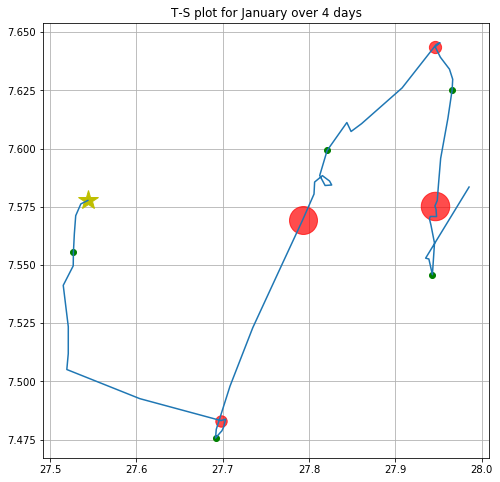

In [271]:
with nc_tools.scDataset(Jan) as f:
    t = f.variables['votemper'][:57,:7,558,155]
    s = f.variables['vosaline'][:57,:7,558,155]
    ssh = f.variables['sossheig'][:57,558,155]
lows = []
highs = []
start_point = 0
interval = 9
target = 'low'
while start_point + interval < 56:
    if target == 'low':
        low = np.argmin(ssh[start_point:start_point + interval])
        lows.append(low + start_point)
        start_point = low + start_point 
        target = 'high'
    elif target == 'high':
        high = np.argmax(ssh[start_point:start_point + interval])
        highs.append(high + start_point)
        start_point = high + start_point 
        target = 'low'
list_of_differences = []
for n in range(4):
    difference = ssh[highs[n]] - ssh[lows[n+1]]
    list_of_differences.append(difference)
list_of_differences  
fig,ax = plt.subplots(1,1,figsize=(8,8))
k = 0
for m in highs:
    ax.plot(s[m,5], t[m,5], 'ro', markersize = 6*(list_of_differences[k]+1), alpha=0.7)
    k = k+1
for n in lows:
    ax.plot(s[n,5], t[n,5], 'go')
ax.plot(s[0,5],t[0,5],'y*', markersize = 20)
ax.plot(s[:,5],t[:,5])
ax.grid('on')
plt.title('T-S plot for January over 4 days')

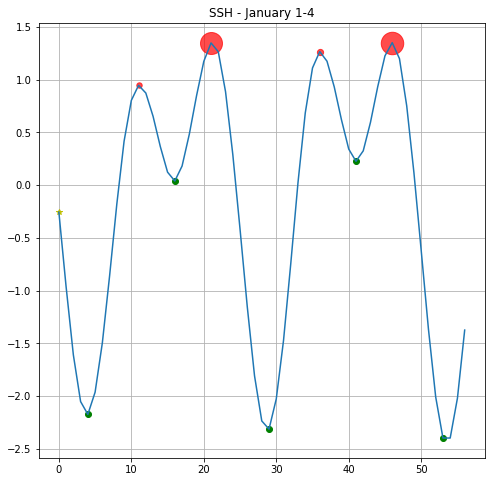

In [272]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
k = 0
for m in highs:
    ax.plot(m, ssh[m], 'ro', markersize = 6*list_of_differences[k], alpha=0.7)
    k = k+1
for n in lows:
    ax.plot(n, ssh[n], 'go')
ax.plot(0,ssh[0],'y*')
ax.plot(range(57),ssh)
ax.grid('on')
ax.set_title('SSH - January 1-4')

# T-S plot maker with scaled markers

In [3]:
def make_TS_with_scaled_markers(files,lon,lat, depth,end_time):    
    with nc_tools.scDataset(files) as f:
        t = f.variables['votemper'][:end_time,depth,lon,lat]
        s = f.variables['vosaline'][:end_time,depth,lon,lat]
        ssh = f.variables['sossheig'][:end_time,lon,lat]
        lows = []
        highs = []
        start_point = 0
        interval = 9
        target = 'low'
        while (start_point + interval) < (end_time - 1):
            if target == 'low':
                low = np.argmin(ssh[start_point:start_point + interval])
                lows.append(low + start_point)
                start_point = low + start_point 
                target = 'high'
            elif target == 'high':
                high = np.argmax(ssh[start_point:start_point + interval])
                highs.append(high + start_point)
                start_point = high + start_point 
                target = 'low'
        list_of_differences = []
        if len(lows) > len(highs):
            for n in range(len(highs)):
                difference = ssh[highs[n]] - ssh[lows[n+1]]
                list_of_differences.append(np.abs(difference))  
        else:
            for n in range(len(highs)-1):
                difference = ssh[highs[n]] - ssh[lows[n+1]]
                list_of_differences.append(np.abs(difference))
        fig,ax = plt.subplots(1,1,figsize=(8,8))
        k = 0
        if len(lows) > len(highs):
            for m in highs:
                ax.plot(s[m], t[m], 'ro', markersize = 6*(list_of_differences[k]+1), alpha=0.7)
                k = k+1
        else:
            for m in highs[:-1]:
                ax.plot(s[m], t[m], 'ro',markersize = 6*(list_of_differences[k]+1), alpha=0.7)
                k = k + 1
            ax.plot(s[highs[-1]],t[highs[-1]],'r^',markersize=20,alpha=0.7)
        for n in lows:
            ax.plot(s[n], t[n], 'go')
        ax.plot(s[0],t[0],'y*', markersize = 20)
        ax.plot(s[:],t[:])
        ax.grid('on')
        ax.set_title('TS plot at depth=' + str(depth)+", at lon=" + str(lon) + ", lat=" + str(lat))

# January 2015

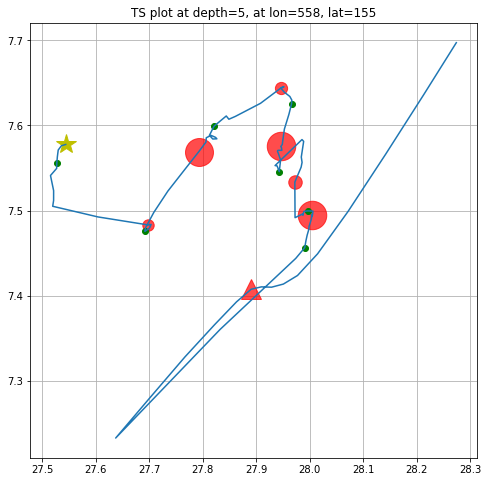

In [4]:
make_TS_with_scaled_markers(Jan,558,155,5,96)

# Febuary 2015

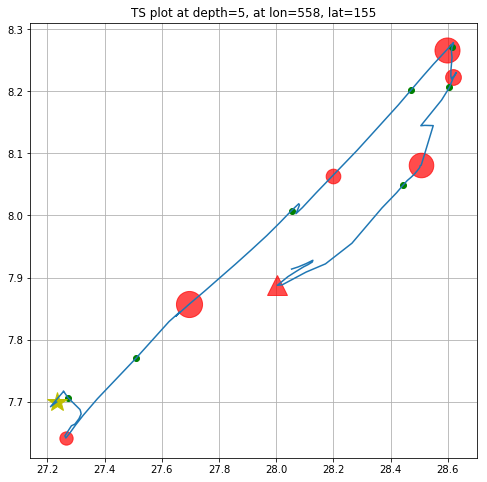

In [279]:
make_TS_with_scaled_markers(Feb,558,155,5,96)

# March 2015

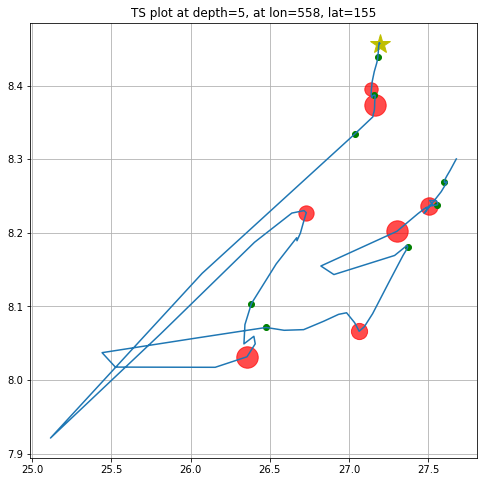

In [287]:
make_TS_with_scaled_markers(Mar,558,155,5,96)

# April 2015

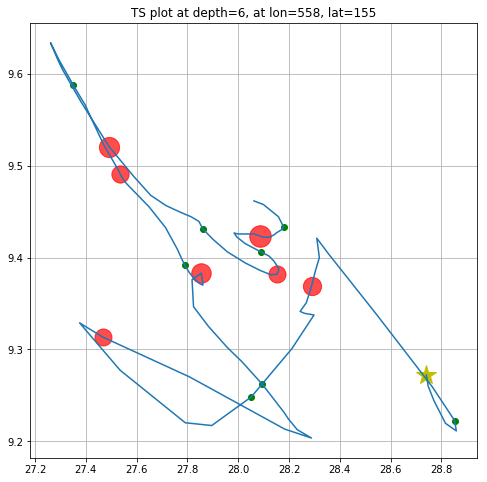

In [291]:
make_TS_with_scaled_markers(Apr,558,155,6,96)

# May 2015

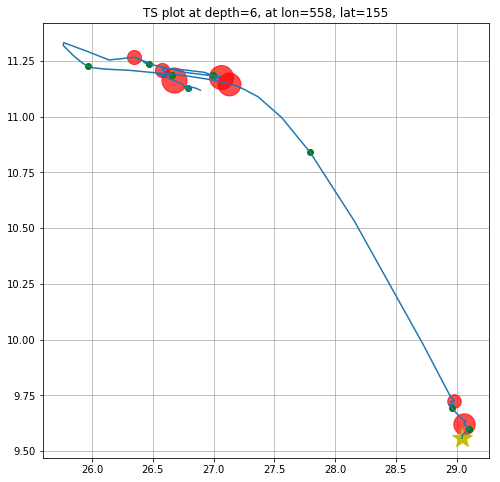

In [292]:
make_TS_with_scaled_markers(May,558,155,6,96)

# June 2015

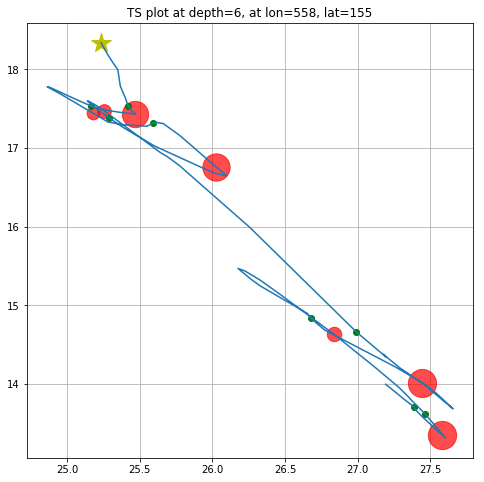

In [293]:
make_TS_with_scaled_markers(Jun,558,155,6,96)

# July 2015

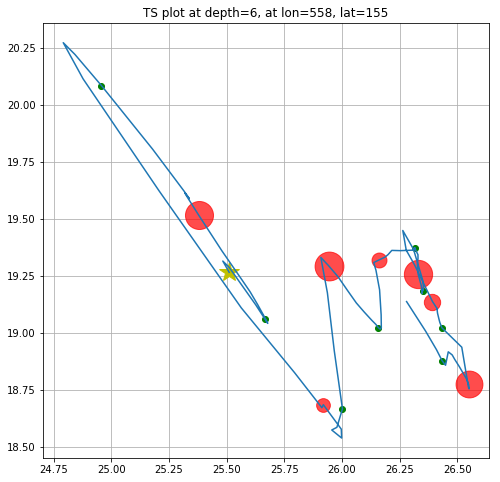

In [294]:
make_TS_with_scaled_markers(Jul,558,155,6,96)

# August 2015

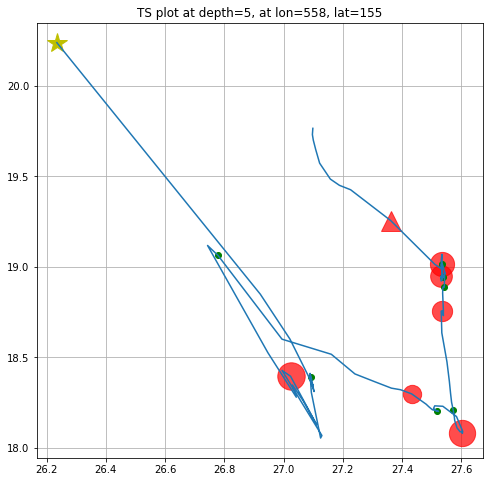

In [295]:
make_TS_with_scaled_markers(Aug,558,155,5,96)

# September 2015

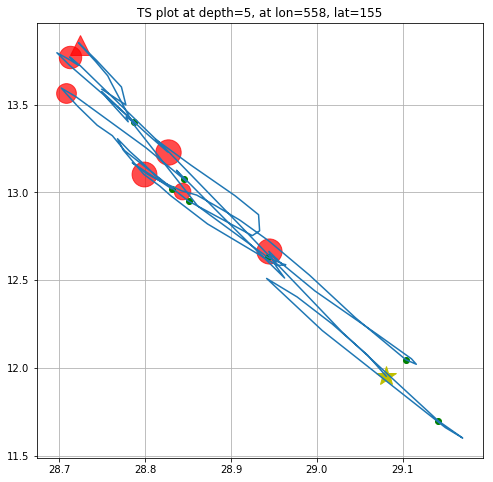

In [296]:
make_TS_with_scaled_markers(Sep,558,155,5,96)

# October 2015

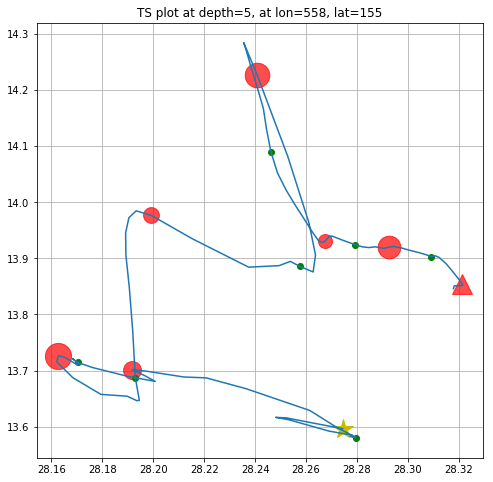

In [297]:
make_TS_with_scaled_markers(Oct,558,155,5,96)

# November 2015

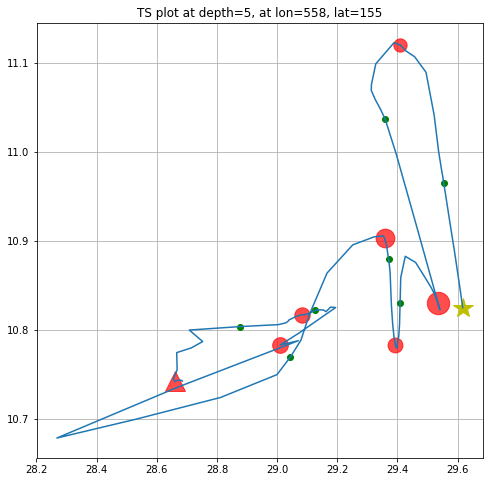

In [298]:
make_TS_with_scaled_markers(Nov,558,155,5,96)

# December 2015

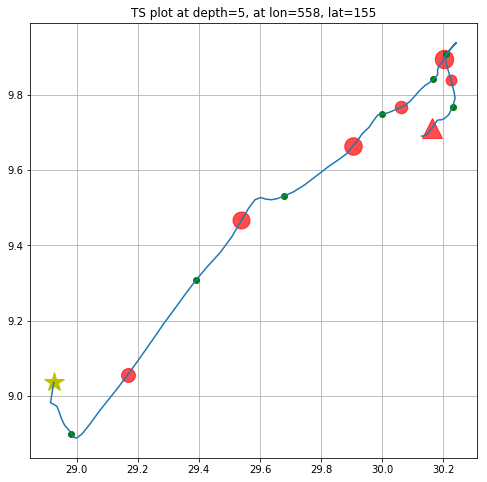

In [299]:
make_TS_with_scaled_markers(Dec,558,155,5,96)

# T-S plot maker without scaled markers

In [222]:
def make_TS(files,lon,lat, depth,):    
    with nc_tools.scDataset(files) as f:
        t = f.variables['votemper'][:96,:7,lon,lat]
        s = f.variables['vosaline'][:96,:7,lon,lat]
        ssh = f.variables['sossheig'][:96,lon,lat]
        lows = []
        highs = []
        start_point = 0
        interval = 9
        target = 'low'
        while start_point + interval < 95:
            if target == 'low':
                low = np.argmin(ssh[start_point:start_point + interval])
                lows.append(low + start_point)
                start_point = low + start_point 
                target = 'high'
            elif target == 'high':
                high = np.argmax(ssh[start_point:start_point + interval])
                highs.append(high + start_point)
                start_point = high + start_point 
                target = 'low'
        fig,ax = plt.subplots(1,1,figsize=(8,8))
        for m in highs:
            ax.plot(s[m,depth], t[m,depth], 'ro')
        for n in lows:
            ax.plot(s[n,depth], t[n,depth], 'go')
        ax.plot(s[0,depth],t[0,depth],'y*', markersize = 20)
        ax.plot(s[:,depth],t[:,depth])
        ax.grid('on')
        ax.set_title('TS plot at depth=' + str(depth)+", at lon=" + str(lon) + ", lat=" + str(lat))

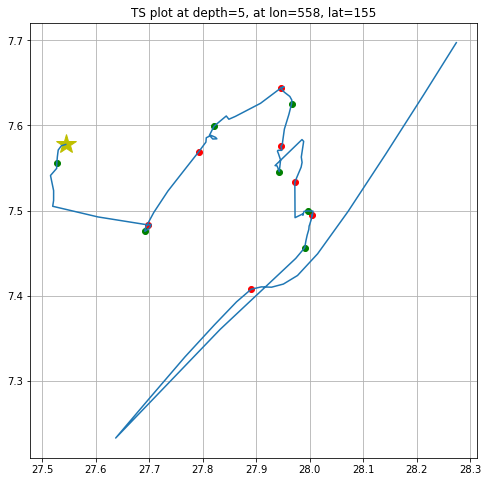

In [223]:
make_TS(Jan,558,155,5)

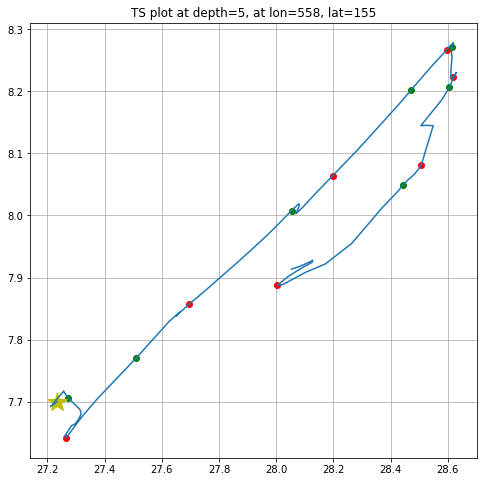

In [224]:
make_TS(Feb, 558,155,5)